In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv("train.csv")
test= pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Lets see how much percentage of values are missing in the cabin column

In [10]:
(train.isnull().sum()/train.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [11]:
(test.isnull().sum()/test.shape[0])*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

More than 70% of the cabin data is missing in both train and test set
.Name,ticket and passenger Id have no impact on the survival..So lets drop the columns

In [12]:
train.drop("Cabin",axis=1,inplace=True)


In [13]:
test.drop("Cabin",axis=1,inplace=True)

In [14]:
train.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)
test.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [15]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Age has 20% data missing,lets do some eda to find the best values to fill in for the missing values


In [17]:
eda_data = train[~train['Age'].isnull()].copy()

In [18]:
eda_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.2+ KB


In [19]:
eda_data.Age.unique()

array([22.  , 38.  , 26.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,  4.  ,
       58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [20]:
eda_data.Age.mode()

0    24.0
dtype: float64

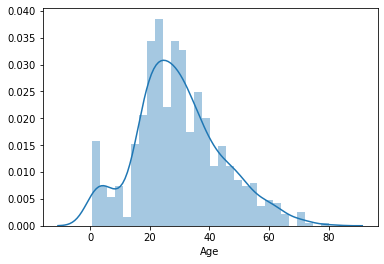

In [21]:
sns.distplot(a=eda_data.Age,bins=30)

So the majority of the people wer of age 24

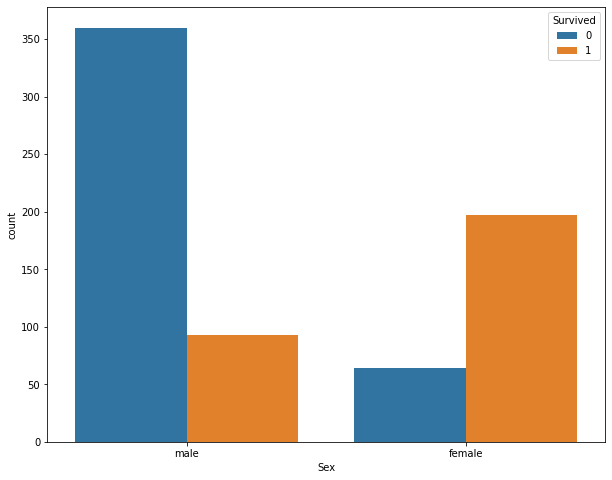

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(x=eda_data.Sex,hue=eda_data.Survived)

From this,we can say that majority of the female survived wen compare to male

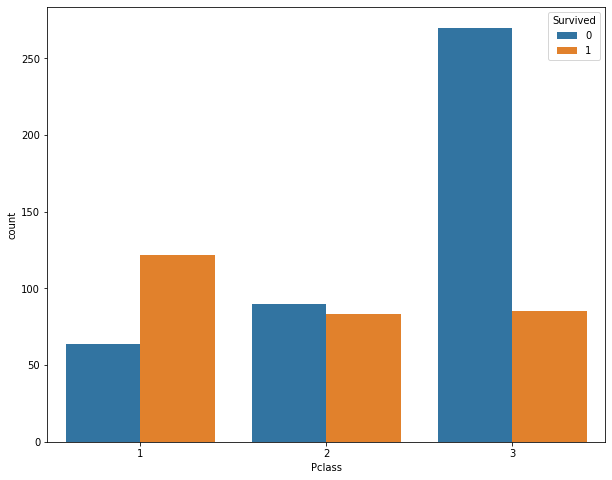

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(x=eda_data.Pclass,hue=eda_data.Survived)

So the people in 1st class seats had a better chance of survival wen compared to the other

Lets try to find the age to fill for null values for each passenger class

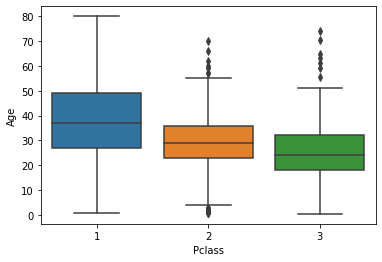

In [24]:
sns.boxplot(x=eda_data.Pclass,y=eda_data.Age)

In [25]:
def impute_Age(cols):
  age=cols[0]
  pclass=cols[1]
  if pd.isna(age):
    return int(train[train['Pclass']==pclass].Age.mean())
  else:
    return age

In [26]:
train['Age'] = train[["Age","Pclass"]].apply(impute_Age,axis=1)

In [27]:
test["Age"] = test[["Age","Pclass"]].apply(impute_Age,axis=1)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [30]:
train.Embarked.value_counts().sort_values(ascending=False).index[0]

'S'

In [31]:
dataset=[train,test]

In [32]:
for data in dataset:
  embarked_val= 'S'
  data.Embarked.fillna(embarked_val)

Now all the null values are taken care of

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [35]:
train.select_dtypes(include=object)

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [36]:
train = pd.get_dummies(train,drop_first=True)
test = pd.get_dummies(test,drop_first=True)

In [37]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,25.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [38]:
test

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,3,25.0,0,0,8.0500,1,0,1
414,1,39.0,0,0,108.9000,0,0,0
415,3,38.5,0,0,7.2500,1,0,1
416,3,25.0,0,0,8.0500,1,0,1


In [131]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [132]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        418 non-null    float64
 5   Sex_male    418 non-null    uint8  
 6   Embarked_Q  418 non-null    uint8  
 7   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.7 KB


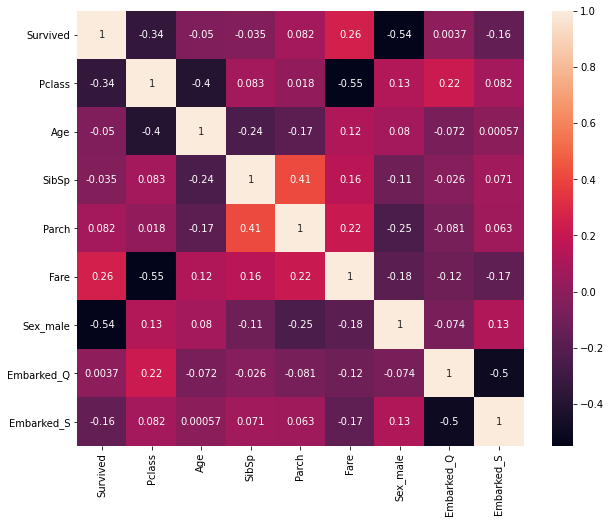

In [39]:
plt.figure(figsize=(10,8)) 
sns.heatmap(train.corr(),annot=True)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif =pd.DataFrame()
vif['features']=train.columns
vif['VIF'] = [variance_inflation_factor(train.values,i) for i in range(train.shape[1])]
vif

,features,VIF
0,Survived,1.965068
1,Pclass,6.826825
2,Age,4.732676
3,SibSp,1.585584
4,Parch,1.627850
5,Fare,1.899351
6,Sex_male,3.775799
7,Embarked_Q,1.611410
8,Embarked_S,4.910510


from heatmap and vif we can see that we dont have much correlation between our features

In [41]:
print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


In [42]:
X= train.drop("Survived",axis=1)
y=train["Survived"]

Now lets implement our models and check the accuracy

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

In [44]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,roc_curve,confusion_matrix,plot_confusion_matrix

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=355,stratify=y)

In [46]:
logistic_reg= LogisticRegression()

In [47]:
log_model = logistic_reg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [48]:
log_model.score(X_test,y_test)

0.8044692737430168

In [49]:
y_pred = log_model.predict(X_test)

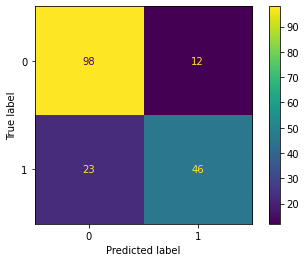

In [50]:
plot_confusion_matrix(log_model,X_test,y_test,values_format='d')

In [51]:
roc_auc_score(y_test,y_pred)

0.7787878787878787

In [52]:
print("Logistic Regression roc_auc_Score:",roc_auc_score(y_test,y_pred))

Logistic Regression roc_auc_Score: 0.7787878787878787


**Logistic Regression roc_auc_Score: 0.7787878787878787**

In [53]:
def get_score(clf):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  return roc_auc_score(y_test,y_pred)

In [54]:
tree_clf = DecisionTreeClassifier()


In [55]:
get_score(tree_clf)

0.7478260869565219

In [56]:
print("Decision Tree roc_auc_Score:",get_score(tree_clf))

Decision Tree roc_auc_Score: 0.7478260869565219


**Decision Tree roc_auc_Score: 0.745125164690382**

Lets use grid search for decision tree


In [57]:
grid_params={
    'criterion':['gini','entropy'],
    'max_depth' :[2,4,6,8,10,12]
}

In [58]:
tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=2),param_grid=grid_params,cv=5)

In [59]:
tree_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=2, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12]},
       

In [60]:
tree_grid.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [61]:
tree_clf = DecisionTreeClassifier(random_state=2,criterion='gini',max_depth=6)

In [62]:
get_score(tree_clf)

0.7661396574440053

In [63]:
print("GridSearch Decision Tree roc_auc_Score:",get_score(tree_clf))

GridSearch Decision Tree roc_auc_Score: 0.7661396574440053


**GridSearch Decision Tree roc_auc_Score: 0.7661396574440053**

In [64]:
rndf_clf = RandomForestClassifier(n_estimators=50)

In [65]:
rndf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
get_score(rndf_clf)

0.7823451910408431

In [69]:
print("Random Forest roc_auc_Score:",get_score(rndf_clf))

Random Forest roc_auc_Score: 0.7705533596837945


**Random Forest roc_auc_Score: 0.7759552042160739**

In [70]:
grid_params={
    'criterion':['gini','entropy'],
    'max_depth' :[2,4,6,8,10,12],
    'n_estimators':[70,100,150]
}

In [71]:
rndf_clf_grid = GridSearchCV(RandomForestClassifier(random_state=2),param_grid=grid_params,cv=5)

In [72]:
rndf_clf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=2,
                                   

In [73]:
rndf_clf_grid.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 70}

In [74]:
rndf_clf = RandomForestClassifier(random_state=2,criterion='gini',max_depth=8,n_estimators=100 )

In [75]:
rndf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [76]:
rndf_clf.score(X_train,y_train)

0.9241573033707865

In [77]:
get_score(rndf_clf)

0.795125164690382

In [78]:
print("Grid Search Random Forest roc_auc_Score:",get_score(rndf_clf))

Grid Search Random Forest roc_auc_Score: 0.795125164690382


**Grid Search Random Forest roc_auc_Score: 0.7814888010540184**

In [79]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [80]:
ada_clf = AdaBoostClassifier(random_state=2)

In [81]:
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=2)

In [82]:
get_score(ada_clf)

0.7633069828722002

In [83]:
print("AdaBoost roc_auc_Score:",get_score(ada_clf))

AdaBoost roc_auc_Score: 0.7633069828722002


**AdaBoost roc_auc_Score: 0.7633069828722002**

In [84]:

grid_params={   
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1],
    'n_estimators':[50,100,150]
}

In [85]:
grid = GridSearchCV(AdaBoostClassifier(random_state=2),param_grid=grid_params,cv=5)

In [86]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=2),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,
                                           1],
                         'n_estimators': [50, 100, 150]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [87]:
grid.best_params_

{'learning_rate': 1, 'n_estimators': 150}

In [88]:
ada_clf = AdaBoostClassifier(random_state=2,learning_rate=1,n_estimators=150)

In [89]:
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=150, random_state=2)

In [90]:
get_score(ada_clf)

0.7777997364953887

In [91]:
print("GridSearch AdaBoost roc_auc_Score:",get_score(ada_clf))

GridSearch AdaBoost roc_auc_Score: 0.7777997364953887


**GridSearch  AdaBoost roc_auc_Score: 0.7777997364953887**

In [92]:
gradb_clf =GradientBoostingClassifier(random_state=2)

In [93]:
gradb_clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [94]:
get_score(gradb_clf)

0.8005270092226614

In [95]:
print("Gradient Boosting roc_auc_Score:",get_score(gradb_clf))

Gradient Boosting roc_auc_Score: 0.8005270092226614


**Gradient Boosting roc_auc_Score: 0.8005270092226614**

In [96]:
grid_params={
    'learning_rate':[0.05,0.1,0.2,0.3],
    'max_depth':[3,4,5],
    'subsample':[1,0.8,0.9],
    'n_estimators':[50,100,150]
}

In [97]:
grid = GridSearchCV(GradientBoostingClassifier(random_state=2),param_grid=grid_params,cv=3)

In [98]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...None,
            

In [99]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

In [100]:
gradb_clf = GradientBoostingClassifier(random_state=2,learning_rate=0.1,max_depth=3,n_estimators=100,subsample=0.8)

In [101]:
gradb_clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [102]:
y_pred = gradb_clf.predict(X_train)

In [103]:
accuracy_score(y_train,y_pred)

0.9101123595505618

In [104]:
get_score(gradb_clf)

0.8050724637681159

In [105]:
print("GridSearch1 Gradient Boosting roc_auc_Score:",get_score(gradb_clf))

GridSearch1 Gradient Boosting roc_auc_Score: 0.8050724637681159


**GridSearch1 Gradient Boosting roc_auc_Score: 0.8050724637681159**

In [106]:
grid_params={
    'learning_rate':[0.1],
    'max_depth':[2,3],
    'subsample':[0.8],
    'n_estimators':[100],
    'max_features':[0.2,0.4,0.6]
}

In [107]:
grid = GridSearchCV(GradientBoostingClassifier(random_state=2),param_grid=grid_params,cv=5)

In [108]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...one,
             

In [109]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 0.4,
 'n_estimators': 100,
 'subsample': 0.8}

In [110]:
gradb_clf = GradientBoostingClassifier(random_state=2,learning_rate=0.1,max_depth=3,n_estimators=100,subsample=0.8,max_features=0.4)

In [111]:
gradb_clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=0.4, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [112]:
get_score(gradb_clf)

0.8114624505928854

In [113]:
print("GridSearch2 Gradient Boosting roc_auc_Score:",get_score(gradb_clf))

GridSearch2 Gradient Boosting roc_auc_Score: 0.8114624505928854


**GridSearch2 Gradient Boosting roc_auc_Score: 0.8114624505928854**

In [114]:
xgb_clf = xgb.XGBClassifier(random_state=2) 

In [115]:
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [116]:
get_score(xgb_clf)

0.7833333333333333

In [117]:
grid_params={
    'learning_rate':[0.1,0.2,0.3],
    'max_depth':[3,4,5],
    'subsample':[1,0.8,0.9],
    'n_estimators':[50,100,150],
    'max_features':[0.2,0.4,0.6]
}

In [118]:
grid = GridSearchCV(xgb.XGBClassifier(random_state=2),param_grid=grid_params,cv=5)

In [119]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=2, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5],
                         'max_features': [0.2, 0.4, 0.6],
           

In [120]:
grid.best_params_

{'learning_rate': 0.3,
 'max_depth': 4,
 'max_features': 0.2,
 'n_estimators': 50,
 'subsample': 0.9}

In [121]:
xgb_clf = xgb.XGBClassifier(random_state=2,learning_rate=0.3,max_depth=4,max_features=0.2,n_estimators=50,subsample=0.9)

In [122]:
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              max_features=0.2, min_child_weight=1, missing=None,
              n_estimators=50, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=2, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9, verbosity=1)

In [123]:
get_score(xgb_clf)

0.7796442687747035

Our gradient boosting approach had the best score.So lets use that!

In [134]:
y_pred = gradb_clf.predict(test)

In [135]:
test['Survived']=y_pred

In [137]:
new_df =pd.read_csv("test.csv")

In [140]:
df = pd.concat([new_df[['PassengerId']],test[['Survived']]],axis=1)

In [141]:
df.to_csv('results.csv',index=False)